# Assignment 4
## 1.  Multiclass Classification using Neural Networks 

#### Apply the forward and backward propagation algorithm discussed in the lab session to classify the Fashion-MNISTimage data. Fashion-MNIST is a fashion product image dataset comprising of 10,000 − 28 × 28 training images with10 categories of fashion products.Carry out the following tasks as assignment problem:

#### 1.Inspect and plot some portion of the training data. Segregate the data into two separate variables consistingof ‘feature matrix’ and corresponding ‘labels’ (first column of the data). Normalize the feature matrix data.Plot some example images along with their descriptive labels.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

Loading data and defining X,y for training ang test data.

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

Getting X,y for training and test data and normalize X by dividing by 255

In [3]:
X_train,y_train = train.iloc[:, 1:].values/255, train.iloc[:, 0]
X_test,y_test = test.iloc[:, 1:].values/255, test.iloc[:, 0]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10000, 784), (10000,), (30, 784), (30,))

### 1.1 Visualizing the data

There are 10000 training examples in `fashion-mnist_train`, where each training example is a 28 pixel by 28 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 28 by 28 grid of pixels is “unrolled” into a 784-dimensional vector. Each
of these training examples becomes a single row in our data matrix $X$. This gives us a 10000 by 784 matrix $X$ where every row is a training example for a handwritten digit image.

$$ X = \begin{bmatrix} - \left(x^{(1)} \right)^T - \\
- \left(x^{(2)} \right)^T - \\
\vdots \\
- \left(x^{(m)} \right)^T - \\
\end{bmatrix}
$$

The second part of the training set is a 10000-dimensional vector `y` that contains labels for the training set. 
The following cell randomly selects 100 images from the dataset and plots them.

In [4]:
def displayData(X,ax):
    """
    Displays the data from X
    """ 
    pixel = np.reshape(X,(28,28))
    ax.imshow(pixel)
    ax.axis("off")

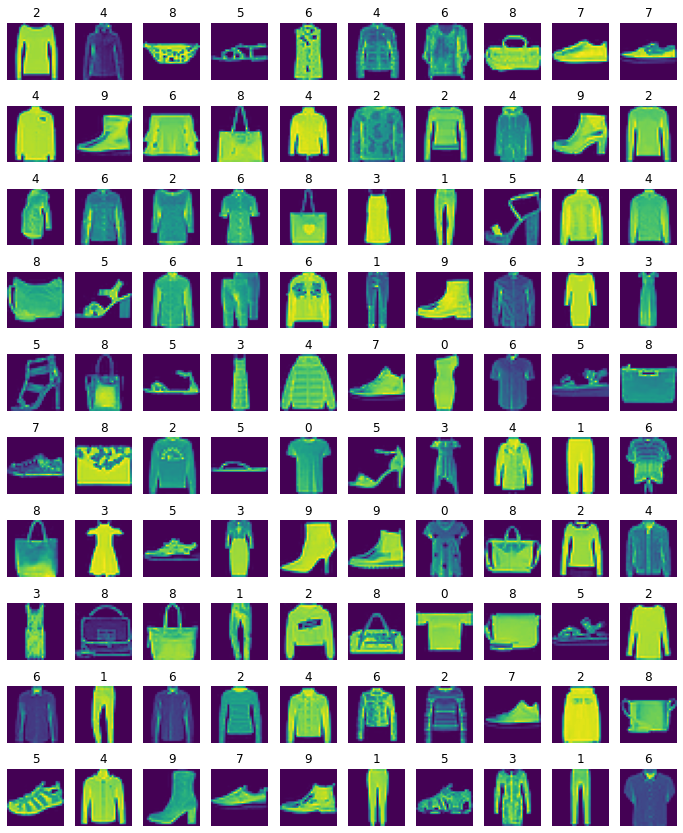

In [5]:
# Randomly select data points to display

pyplot.figure(figsize = (12,15))

for i in range(100):
    ax = pyplot.subplot(10,10,i+1)
    k = np.random.randint(X_train.shape[0])
    displayData(X_train[k,:],ax)
    ax.set_title(str(y_train[k]))


Concatenate bias = 1 layer to X in training and test data

In [6]:
N,M = X_train.shape
X_train = np.concatenate([np.ones((N,1)),X_train],axis = 1)
X_train.shape
N,M = X_test.shape
X_test = np.concatenate([np.ones((N,1)),X_test],axis = 1)
X_test.shape,X_train.shape

((30, 785), (10000, 785))

#### 2. Classify the dataset using neural networks, with two hidden layers. The number of nodes in the hidden layers is your choice, as discussed in class. Calculate the optimized weights and biases and training set accuracy for the model (take regularization parameter = 0.1)

###  Model representation

Our neural network is shown in the following figure.

![](Figures/neural_network.png)

It has 4 layers - an input layer, 2 hidden layers and an output layer. Recall that our inputs are pixel values
of digit images. Since the images are of size $28 \times 28$, this gives us 784 nput layer units (not counting the extra bias unit which always outputs +1). The training data was loaded into the variables `X_train` and `y_train` above.

In [7]:
# Setup the parameters you will use for this exercise
size_i  = 784 # 28x28 Input Images of Digits
size_h1 = 25 # 25 hidden units in hidden layer 1 
size_h2 = 25 # 25 hidden units in hidden layer 2 
num_labels = 10  # 10 labels, from 0 to 9

In [8]:
## Defining some useful functions based on definition

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(X):
    x = X.copy()
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(X):
    x = X.copy()
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

    
def softmax(x): 
    f = np.copy(x)
    yh = np.exp(f)
    for i in range(yh.shape[0]):
        yh[i,:] /= np.sum(yh[i,:])
    return yh    


def OneHot(y,c):
    n = y.shape[0]
    yo = np.zeros((n,c))
    for r in range(n):
        yo[r,y[r]] = 1
    return yo

In [9]:
# Function to initialize random weigths bw -epsilon to + epsilon 
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.zeros((L_out,L_in+1))
    return np.random.uniform(-epsilon_init,epsilon_init,W.shape)

In [10]:
# Initialize 3 weights matrix for 3 layers (bias in weight included)
np.random.seed(42)
w1 = randInitializeWeights(size_i,size_h1)
w2 = randInitializeWeights(size_h1,size_h2)
w3 = randInitializeWeights(size_h2,num_labels)
w1.shape,w2.shape,w3.shape

((25, 785), (25, 26), (10, 26))

### Function to predict based on given weights and activation function

In [11]:
def predict(w1, w2,w3, X,act):
    if X.ndim==1:
        X=X[None]
    
    m = X.shape[0]
    
    if(act == "relu"):
        # Front propogation
        a1 = relu(X@w1.T)
        a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

        a2 = relu(a1@w2.T)
        a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
        
        p = softmax(a2@w3.T)

        
    else:
       # Front propogation
        a1 = sigmoid(X@w1.T)
        a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

        a2 = sigmoid(a1@w2.T)
        a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
     
        p = softmax(a2@w3.T)


    return np.argmax(p,axis = 1)



### Cost function that returns J and grad 

In [12]:
def nnCostFunction(nn_params,
                   size_i,
                   size_h1,
                   size_h2,
                   num_labels,
                   X, y, lambda_,act):

    # Recover w1,w2,w3
    w1 = np.reshape(nn_params[:size_h1 * (size_i + 1)],
                        (size_h1, (size_i + 1)))

    w2 = np.reshape(nn_params[size_h1 * (size_i + 1):size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1) ],
                        (size_h2, (size_h1 + 1)))
    
    w3 = np.reshape(nn_params[size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1):],
                        (num_labels, (size_h2 + 1)))
    
  
    m = y.shape[0]
 
    
    if(act == "relu"):
        #Front propogation
        a1 = relu(X@w1.T)
        a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

        a2 = relu(a1@w2.T)
        a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
        
        hw = softmax(a2@w3.T)
        
        #back propogation
        delta4 = (hw - y)
        delta3 = relu_derivative(a1@w2.T)*(delta4@w3[:,1:])
        delta2 = relu_derivative(X@w1.T)*(delta3@w2[:,1:])
        
    else:
       #Front propogation
        a1 = sigmoid(X@w1.T)
        a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

        a2 = sigmoid(a1@w2.T)
        a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
     
        hw = softmax(a2@w3.T)

        #back propogation
        delta4 = (hw - y) 
        
        delta3 = sigmoid_derivative(a1@w2.T)*(delta4@w3[:,1:]) 
     
        delta2 = sigmoid_derivative(X@w1.T)*(delta3@w2[:,1:])

        
    J = (lambda_*(np.sum(np.square(w2[1:,:]))+np.sum(np.square(w1[1:,:]))+np.sum(np.square(w3[1:,:]))) + #Regularization term
             2*np.sum(-y*np.log(hw)))/(2*m)    

   
    w3_grad = delta4.T@a2
    w3_grad[:,1:]  += (lambda_)*w3[:,1:] #Regularization term

    w2_grad = delta3.T@a1
    w2_grad[:,1:] += (lambda_)*w2[:,1:] #Regularization term

    w1_grad = delta2.T@X 
    w1_grad[:,1:] += (lambda_)*w1[:,1:] #Regularization term
    
    grad = np.concatenate([w1_grad.ravel(), w2_grad.ravel(),w3_grad.ravel()], axis=0)/m 
   
    return J,grad

#### 3.Implement sigmoid and ReLu activation functions and see which performs best. Add a SoftMax activation for the output layer for both cases.

## First we will begin with sigmoid activation function 

In [13]:
#Initialize parameters
initial_nn_params = np.concatenate([w1.ravel(), w2.ravel(),w3.ravel()], axis=0)

y_hot = OneHot(y_train,10)

In [14]:
nnCostFunction(initial_nn_params,size_i,size_h1,size_h2,num_labels,X_train, y_hot, 0,"sigmoid")

(2.311726060119253,
 array([-1.65649144e-05, -9.18283781e-10, -1.27416240e-08, ...,
         7.91717502e-03,  8.89569253e-03,  8.79995915e-03]))

In [15]:
# Callback to keep recored of J
J_sigmoid = []
def callbackSigmoid(w):
  j,_ = nnCostFunction(w,size_i,size_h1,size_h2,num_labels,X_train, y_hot, 0.1,"sigmoid")
  J_sigmoid.append(j)

In [16]:
# Set number of iterations
options= {'maxiter': 800}

#  Set lambda
lambda_ = 0.1

#Define activation
act = "sigmoid"

# Create "short hand" for the cost function to be minimized

costFunction = lambda p: nnCostFunction(p,size_i,size_h1,size_h2,num_labels,X_train, y_hot, lambda_,act)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options,
                       callback = callbackSigmoid)

In [17]:
res # Gives us overview and convergence status

     fun: 0.06517175689312538
     jac: array([-1.72183475e-05,  4.61717236e-07,  1.35993541e-08, ...,
        3.70209401e-05,  2.65566766e-05,  1.80653014e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 801
     nit: 47
  status: 3
 success: False
       x: array([ 2.0231512 ,  0.04617143,  0.0028249 , ..., -0.53404573,
       -0.15886164,  0.04444067])

In [18]:
nn_params = res.x
# Get w1 , w2 ,w3 optimized ones and recover them for use
w1 = np.reshape(nn_params[:size_h1 * (size_i + 1)],
                        (size_h1, (size_i + 1)))

w2 = np.reshape(nn_params[size_h1 * (size_i + 1):size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1) ],
                        (size_h2, (size_h1 + 1)))
    
w3 = np.reshape(nn_params[size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1):],
                        (num_labels, (size_h2 + 1)))
w1,w2,w3

(array([[ 2.0231512 ,  0.04617143,  0.0028249 , ..., -0.23857582,
         -0.32706   , -0.15463943],
        [ 0.07180301,  0.00981471, -0.01154282, ..., -0.05783004,
          0.01294573, -0.00579677],
        [-0.79226489, -0.03563279,  0.02635316, ...,  0.01628094,
          0.05793225,  0.02751159],
        ...,
        [-0.11275038,  0.03788868,  0.00282641, ...,  0.03161986,
          0.02318954, -0.03901024],
        [-1.0116626 ,  0.04082854, -0.00889565, ..., -0.096271  ,
          0.0236828 , -0.03003241],
        [ 1.00310897,  0.04644281,  0.01295946, ...,  0.06389376,
          0.07802534, -0.02142816]]),
 array([[-5.22640234e-01, -1.93918518e+00, -4.47667440e-01,
         -3.14963603e-01,  6.40694059e-01, -6.76735012e-01,
          1.49000012e-01, -9.55173496e-01,  3.90668967e-01,
          8.87605159e-04, -2.08594580e-02,  2.17502908e+00,
          6.44780188e-01, -7.52208441e-01, -4.72918545e-02,
         -8.08840437e-01,  5.66629816e-01,  9.85089815e-01,
          6.7

In [19]:
pred = predict(w1, w2,w3, X_train,"sigmoid") # Prediction of Training Set 
print('Training Set Accuracy for Sigmoid: %f' % (np.mean(pred == y_train) * 100))

Training Set Accuracy for Sigmoid: 99.380000


## For Relu activation

In [20]:
np.random.seed(42)
w1_ = randInitializeWeights(size_i,size_h1)
w2_ = randInitializeWeights(size_h1,size_h2)
w3_ = randInitializeWeights(size_h2,num_labels)
initial_nn_params2 = np.concatenate([w1_.ravel(), w2_.ravel(),w3_.ravel()], axis=0)

In [21]:
nnCostFunction(initial_nn_params2,size_i,size_h1,size_h2,num_labels,X_train, y_hot, 0,"relu")

(2.2972103427134303,
 array([-7.77208071e-04,  0.00000000e+00, -2.29585373e-07, ...,
        -9.23947517e-03, -1.13765968e-02,  1.27266249e-03]))

In [22]:
J_relu = []
def callbackrelu(w):
  j,_ = nnCostFunction(w,size_i,size_h1,size_h2,num_labels,X_train, y_hot, 0.1,"relu")
  J_relu.append(j)

In [23]:
#  Set iteration limit
options= {'maxiter': 800}

#  Set value of lambda
lambda_ = 0.1
act = "relu"
# Create "short hand" for the cost function to be minimized

costFunction = lambda p: nnCostFunction(p,size_i,size_h1,size_h2,num_labels,X_train, y_hot, lambda_,act)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res2 = optimize.minimize(costFunction,
                        initial_nn_params2,
                        jac=True,
                        method='TNC',
                        options=options,
                        callback=callbackrelu)

In [24]:
res2

     fun: 0.020377712265123134
     jac: array([-3.61318118e-04,  9.36090232e-07,  4.52987958e-07, ...,
       -1.92318153e-04, -1.91106977e-04, -1.48001998e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 801
     nit: 66
  status: 3
 success: False
       x: array([ 1.05819634,  0.09320604,  0.04531887, ..., -0.01802564,
       -0.15661291, -0.148002  ])

In [25]:
nn_params2 = res2.x
w1_ = np.reshape(nn_params2[:size_h1 * (size_i + 1)],
                        (size_h1, (size_i + 1)))

w2_ = np.reshape(nn_params2[size_h1 * (size_i + 1):size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1) ],
                        (size_h2, (size_h1 + 1)))
    
w3_ = np.reshape(nn_params2[size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1):],
                        (num_labels, (size_h2 + 1)))
w1_,w2_,w3_

(array([[ 1.05819634,  0.09320604,  0.04531887, ..., -0.18409145,
         -0.09910638,  0.00631934],
        [ 0.72686822,  0.01635276, -0.01008304, ..., -0.71996969,
         -0.32707426, -0.03473287],
        [-0.03949756, -0.0696353 ,  0.04997176, ...,  0.02169538,
          0.07765768,  0.04720748],
        ...,
        [-0.65940095,  0.07463416,  0.00613454, ...,  0.15805037,
          0.08293186, -0.05799658],
        [ 0.31138173,  0.08062682, -0.00671622, ..., -0.79712922,
         -0.26253245, -0.09011353],
        [-0.65010347,  0.09562226,  0.07177931, ...,  0.43180093,
          0.33610536, -0.10625987]]),
 array([[ 1.62098823e+00, -3.36781478e-01,  2.60974326e-01,
          1.37312784e-02,  5.26644389e-01, -2.98208458e-02,
         -6.86085022e-01,  1.80029669e+00,  2.32181419e-02,
          1.20925717e+00, -9.87973987e-01, -4.87996810e-02,
          2.29621306e-01, -2.64613395e-01, -4.84419572e-02,
          2.70689115e-01,  1.51873521e-01,  3.32686264e-02,
         -5.9

In [26]:
pred_ = predict(w1_, w2_,w3_, X_train,"relu")
print('Training Set Accuracy for Relu Function: %f' % (np.mean(pred_ == y_train) * 100))

Training Set Accuracy for Relu Function: 99.870000


#### 4. Apply the trained model algorithm on the normalized test dataset and predict the testing accuracy of the model for both sets of activation functions (Use the optimized weights calculated using training data).

In [27]:
pred1_ = predict(w1_, w2_,w3_, X_test,"relu")
print('Test Set Accuracy for Relu function: %f' % (np.mean(pred1_ == y_test) * 100))

Test Set Accuracy for Relu function: 80.000000


In [28]:
pred1 = predict(w1, w2,w3, X_test,"sigmoid") # Prediction of Test Set 
print('Test Set Accuracy for Sigmoid: %f' % (np.mean(pred1 == y_test) * 100))

Test Set Accuracy for Sigmoid: 86.666667


#### 5. Use the test data to plot few images along with the model-prediction labels/classes.

Plotting some test data with labels for sigmoid activation

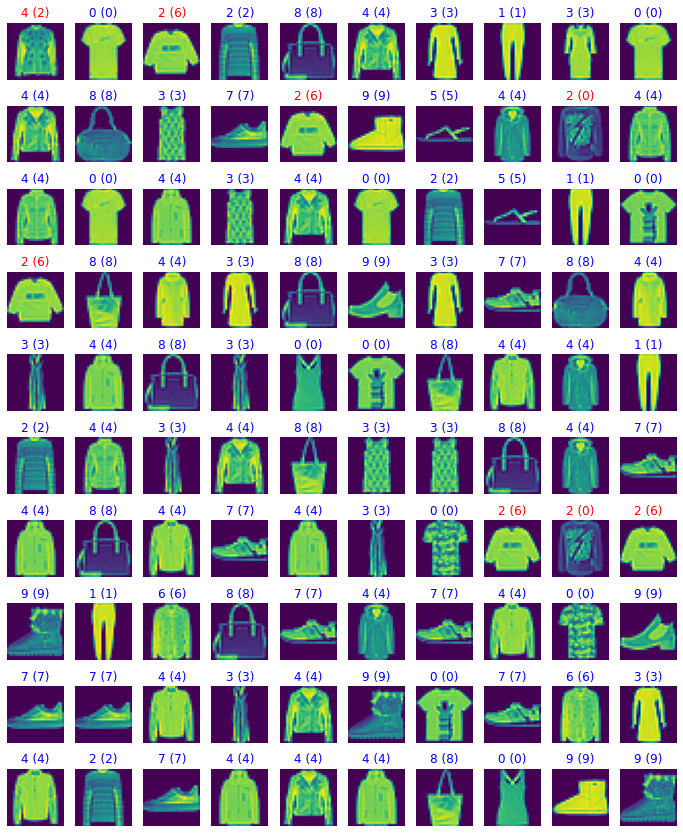

In [29]:
# Randomly select data points to display
pyplot.figure(figsize = (12,15))
for i in range(100):
    ax = pyplot.subplot(10,10,i+1)
    k = np.random.randint(X_test.shape[0])

    displayData(X_test[k,1:],ax)
    if pred1[k] != y_test[k]:
        ax.set_title(f"{y_test[k]} ({pred1[k]})", color="red")
    else:
        ax.set_title(f"{y_test[k]} ({pred1[k]})", color="blue")

Plotting some test data with labels for relu activation

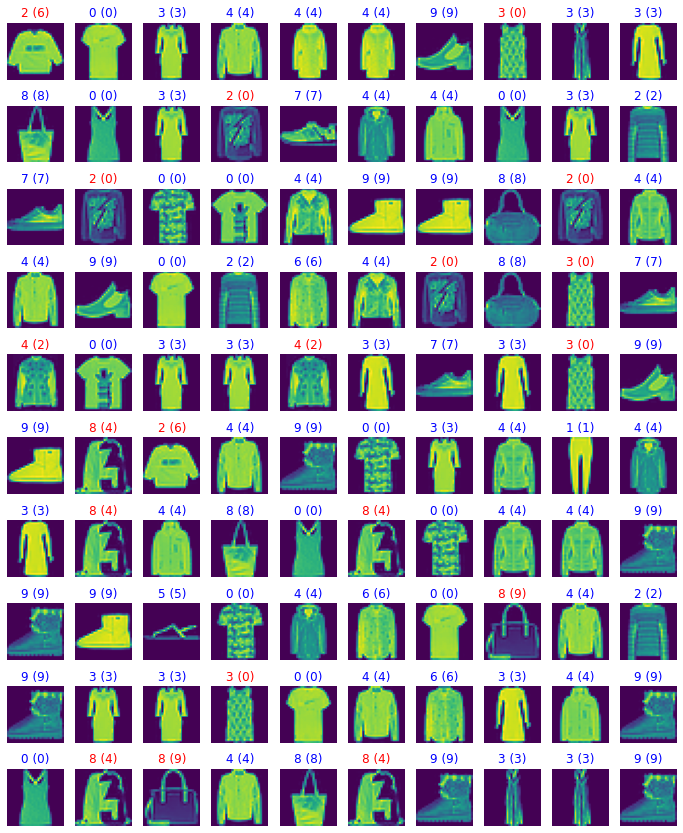

In [30]:
# Randomly select data points to display
pyplot.figure(figsize = (12,15))
for i in range(100):
    ax = pyplot.subplot(10,10,i+1)
    k = np.random.randint(X_test.shape[0])

    displayData(X_test[k,1:],ax)
    if pred1_[k] != y_test[k]:
        ax.set_title(f"{y_test[k]} ({pred1_[k]})", color="red")
    else:
        ax.set_title(f"{y_test[k]} ({pred1_[k]})", color="blue")

#### 6. Compare how the two NNs fare in terms of prediction accuracy for the same number of optimisation iterations and comment what you can conclude from that

In [31]:
pred = predict(w1, w2,w3, X_train,"sigmoid") # Prediction of Training Set 
print('Training Set Accuracy for Sigmoid: %f' % (np.mean(pred == y_train) * 100))

Training Set Accuracy for Sigmoid: 99.380000


In [32]:
pred_ = predict(w1_, w2_,w3_, X_train,"relu")
print('Training Set Accuracy for Relu Function: %f' % (np.mean(pred_ == y_train) * 100))

Training Set Accuracy for Relu Function: 99.870000


In [33]:
pred1 = predict(w1, w2,w3, X_test,"sigmoid") # Prediction of Test Set 
print('Test Set Accuracy for Sigmoid: %f' % (np.mean(pred1 == y_test) * 100))

Test Set Accuracy for Sigmoid: 86.666667


In [34]:
pred1_ = predict(w1_, w2_,w3_, X_test,"relu")
print('Test Set Accuracy for Relu function: %f' % (np.mean(pred1_ == y_test) * 100))

Test Set Accuracy for Relu function: 80.000000


As one can see , sigmoid gives better performance in testing data while accuracy is nearly same for training data (both > 99 %))

#### 7. Plot the evolution of cost function over optimization iterations J

Plot the evolution of cost function over optimization iterations

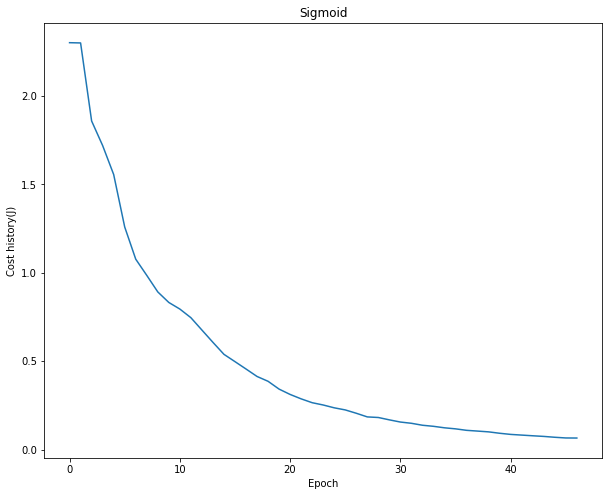

In [35]:
pyplot.figure(figsize=(10, 8))
pyplot.plot(J_sigmoid)
pyplot.xlabel("Epoch")
pyplot.ylabel("Cost history(J)")
pyplot.title("Sigmoid")
pyplot.show()

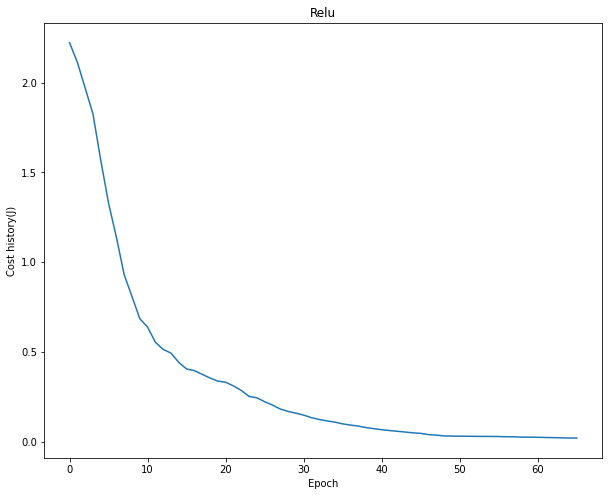

In [36]:
pyplot.figure(figsize=(10, 8))
pyplot.plot(J_relu)
pyplot.xlabel("Epoch")
pyplot.ylabel("Cost history(J)")
pyplot.title("Relu")
pyplot.show()

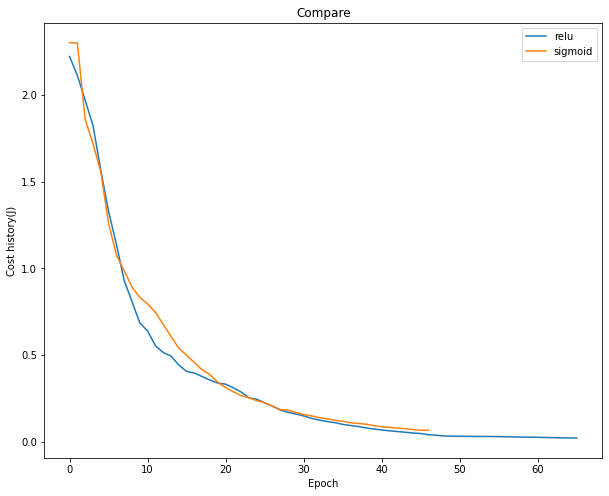

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(J_relu,label = "relu")
plt.plot(J_sigmoid,label = "sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Cost history(J)")
plt.title("Compare")
plt.legend()
plt.show()

## Question 2

1. Use the following code snippet to generate a ‘Binary Classification’ dataset

In [40]:
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
X, y = sklearn.datasets.make_moons(500, noise=0.30)

2. Write a Neural Network code to do Binary Classification using Non-linear Logistic Regression and plot the
decision boundary with scattered data-points in the same plot

In [41]:
y = y[:, np.newaxis] # Size optimization
X.shape,y.shape

((500, 2), (500, 1))

Text(0.5, 1.0, 'Visualize data')

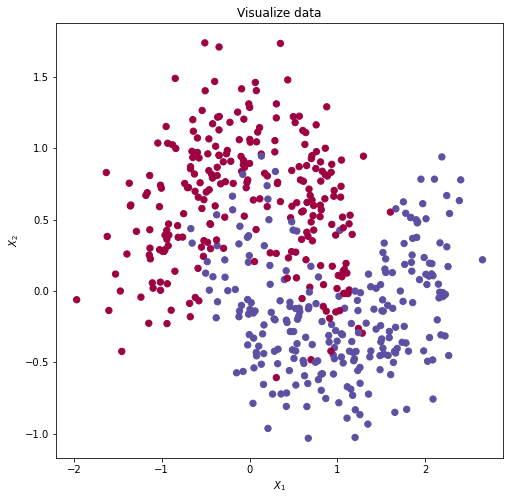

In [42]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
    
# lets visualize the data:
ax.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_title('Visualize data')

Split data into training and test data.

In [43]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4)

Add bias layer to X for training and test data

In [44]:
N,M = X_train2.shape
X_train2 = np.concatenate([np.ones((N,1)),X_train2],axis = 1)

N,M = X_test2.shape
X_test2 = np.concatenate([np.ones((N,1)),X_test2],axis = 1)
X_test2.shape,X_train2.shape,y_train2.shape

((200, 3), (300, 3), (300, 1))

In [45]:
y_train2 = np.array(y_train2)
y_train2.shape

(300, 1)

Set structure of neural network 

In [46]:
input_size = X_train2.shape[1] -  1
hidden_size_1 = 25
hidden_size_2 = 25
output_size = 1

In [47]:
W1 = randInitializeWeights(input_size,hidden_size_1)
W2 = randInitializeWeights(hidden_size_1,hidden_size_2)
W3 = randInitializeWeights(hidden_size_2,output_size)
param = np.concatenate([W2.ravel(), W1.ravel(),W3.ravel()], axis=0)
W1.shape,W2.shape,W3.shape

((25, 3), (25, 26), (1, 26))

In [48]:
def nnCF(nn_params,
                   size_i,
                   size_h1,
                   size_h2,
                   num_labels,
                   X, y, lambda_):

    
    w1 = np.reshape(nn_params[:size_h1 * (size_i + 1)],
                        (size_h1, (size_i + 1)))

    w2 = np.reshape(nn_params[size_h1 * (size_i + 1):size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1) ],
                        (size_h2, (size_h1 + 1)))
    
    w3 = np.reshape(nn_params[size_h1 * (size_i + 1)+ size_h2* (size_h1 + 1):],
                        (num_labels, (size_h2 + 1)))
    
  
    m = y.shape[0]
 
     # Front propogation  
    a1 = sigmoid(X@w1.T)
    a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

    a2 = sigmoid(a1@w2.T)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
     
    hw = sigmoid(a2@w3.T)
     
        #Back Propogation
    delta4 = sigmoid_derivative(hw)*(hw - y) 
 
    delta3 = sigmoid_derivative(a1@w2.T)*(delta4@w3[:,1:]) 
     
    delta2 = sigmoid_derivative(X@w1.T)*(delta3@w2[:,1:])

      # Cost Logistic  
    J = (lambda_*(np.sum(np.square(w2[1:,:]))+np.sum(np.square(w1[1:,:]))+np.sum(np.square(w3[1:,:]))) + #regularization
             2*np.sum(-y*np.log(hw) - (1-y)*np.log(1-hw)))/(2*m)    

   
    w3_grad = delta4.T@a2
    w3_grad[:,1:]  += (lambda_)*w3[:,1:] #regularization

    w2_grad = delta3.T@a1
    w2_grad[:,1:] += (lambda_)*w2[:,1:] #regularization

    w1_grad = delta2.T@X 
    w1_grad[:,1:] += (lambda_)*w1[:,1:] #regularization
    
    grad = np.concatenate([w1_grad.ravel(), w2_grad.ravel(),w3_grad.ravel()], axis=0)/m 
   
    return J,grad 

In [49]:
nnCF(param,input_size,hidden_size_1,hidden_size_2,output_size,X_train2, y_train2, 0.01)

(0.6929866388428634,
 array([ 5.31244585e-09,  6.76005916e-06, -9.63453573e-07,  1.29843397e-06,
        -8.90251088e-05,  7.11376245e-05,  1.57688271e-06, -1.10474365e-04,
         8.56145148e-05,  8.78103776e-07, -4.91513072e-05,  3.48284247e-05,
         2.74580079e-07, -2.71440819e-05,  2.01440889e-05, -3.86913774e-07,
         2.80264687e-05, -2.13430988e-05,  4.46921799e-07, -2.63184542e-05,
         2.38155801e-05,  9.77014744e-07, -6.43136537e-05,  4.90525595e-05,
         1.75788382e-06, -1.09860239e-04,  8.33640551e-05, -7.27678550e-07,
         3.96842511e-05, -3.11325114e-05,  1.04062855e-08, -2.92857873e-06,
         3.98646595e-06,  3.78481463e-07, -2.69617620e-05,  1.80852519e-05,
         5.79082249e-07, -3.22321426e-05,  2.47389073e-05, -1.11612749e-06,
         7.44592827e-05, -5.42473311e-05,  1.09754230e-06, -7.40999510e-05,
         5.22528320e-05,  1.09735639e-06, -6.94594934e-05,  5.36655448e-05,
         1.74258209e-06, -1.00594674e-04,  7.17236073e-05, -8.77790

In [50]:
#  Max iteration numbers
options= {'maxiter': 400}

#  Set lambda
lambda_ = 0.1

# Create "short hand" for the cost function to be minimized

costFunction = lambda p: nnCF(p,input_size,hidden_size_1,hidden_size_2,output_size,X_train2, y_train2, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res3 = optimize.minimize(costFunction,
                        param,
                        jac=True,
                        method='TNC',
                        options=options)

In [51]:
prms = res3.x
W1 = np.reshape(prms[:hidden_size_1 * (input_size + 1)],
                        (hidden_size_1, (input_size + 1)))

W2 = np.reshape(prms[hidden_size_1 * (input_size + 1):hidden_size_1 * (input_size + 1)+ hidden_size_2* (hidden_size_1 + 1) ],
                        (hidden_size_2, (hidden_size_1 + 1)))
    
W3 = np.reshape(prms[hidden_size_1 * (input_size + 1)+ hidden_size_2* (hidden_size_1 + 1):],
                        (output_size, (hidden_size_2 + 1)))
W1,W2,W3

(array([[ 6.85884723e-02, -2.95793469e-01,  7.42814796e-01],
        [-1.13305578e-01,  2.61577673e-01, -7.75187779e-01],
        [-1.06655129e-01,  2.53980677e-01, -7.18480256e-01],
        [ 1.01468943e-01, -3.19114057e-01,  8.79968896e-01],
        [ 9.37051203e-02, -3.14911959e-01,  8.41696572e-01],
        [ 1.72771504e-02, -2.37444364e-01,  5.88214439e-01],
        [-7.32157382e-02,  1.15109464e-01, -2.66758008e-01],
        [ 3.96281802e-02, -2.49284335e-01,  6.25519341e-01],
        [-1.03905582e-01,  2.57278472e-01, -7.54364001e-01],
        [ 3.19130385e-02,  1.01372751e-01, -2.49404392e-01],
        [ 1.05383474e-01, -3.09473847e-01,  8.94205159e-01],
        [-1.29279296e-01,  2.60074703e-02, -6.40486823e-02],
        [ 8.26802261e-02, -3.13404829e-01,  8.49227397e-01],
        [ 1.22396101e-01, -3.04173859e-01,  9.12693977e-01],
        [-1.15697725e-01,  2.66795738e-01, -7.85836950e-01],
        [-1.16117721e-01,  2.65008314e-01, -7.80718033e-01],
        [-1.49183607e-01

In [52]:
def guess(W1,W2,W3,X): # Works as predict for this part
    m = X.shape[0]
    a1 = sigmoid(X@W1.T)
    a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

    a2 = sigmoid(a1@W2.T)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
     
    hw = sigmoid(a2@W3.T)
    hw[hw<0.5] =  0
    hw[hw>=0.5] = 1
    return hw

In [53]:
pre = guess(W1,W2,W3,X_train2)
print('Training Set Accuracy: %f' % (np.mean(pre == y_train2) * 100))

Training Set Accuracy: 87.666667


In [54]:
pre2 = guess(W1,W2,W3,X_test2)
print('Training Set Accuracy: %f' % (np.mean(pre2 == y_test2) * 100))

Training Set Accuracy: 85.000000


In [55]:
def guess1(x): # For decision boundary plot, specially defined

    m = x.shape[1]
    X = np.concatenate([np.ones((1,m)),x],axis = 0).T
    a1 = sigmoid(X@W1.T)
    a1 = np.concatenate([np.ones((m, 1)), a1], axis=1)

    a2 = sigmoid(a1@W2.T)
    a2 = np.concatenate([np.ones((m, 1)), a2], axis=1)
     
    hw = sigmoid(a2@W3.T)
    hw[hw<0.5] =  0
    hw[hw>=0.5] = 1
    return hw

In [56]:
def plot_decision_boundary_NN(func, x_input, y_input, ax=None): # Refer from internet
    xx_1, xx_2 = np.mgrid[np.min(x_input[:,0]):np.max(x_input[:,0]):.01, np.min(x_input[:,1]):np.max(x_input[:,1]):.01]
    grid = np.c_[xx_1.ravel(), xx_2.ravel()].T
    y_pred_grid = func(grid).reshape(xx_1.shape)
    y_pred = func(x_input.T)
    
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize=(10,10))
        
    contour = ax.contourf(xx_1, xx_2, y_pred_grid, alpha=0.7, cmap="Spectral")
    ax.scatter(x_input[:,0], x_input[:, 1], c=y_pred, s=50, cmap="Spectral", edgecolor="white", linewidth=1)
    
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
            ]
    ax.set(aspect='equal', 
           xlim=(np.min(x_input[:,0]), np.max(x_input[:,0])), ylim=(np.min(x_input[:,1]),np.max(x_input[:,1])),
           xlabel="$X_1$", ylabel="$X_2$")
    return ax

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 2')

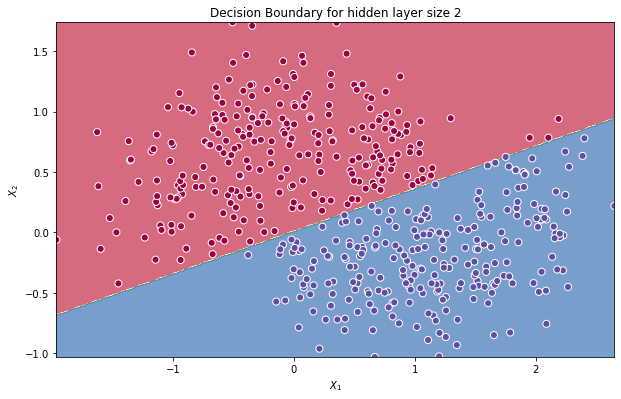

In [57]:
plot_decision_boundary_NN(lambda x: guess1( x), X, y)
plt.title("Decision Boundary for hidden layer size " + str(2))